# 📉 Cost Function - Andrew n g course
## 🧠 What is a Cost Function?

In Linear Regression, we try to fit a straight line that best represents the relationship between the input feature x and the target variable y.

Our model (hypothesis) is:

##### fw,b(x)=w⋅x+b

Where:

w → weight (slope)

b → bias (intercept)

fw,b(x) → predicted value (also written as y^)

## 🎯 Why Do We Need a Cost Function?

Depending on the values of w and b, the line we draw (i.e., our hypothesis fw,b(x)) will change.

Some lines fit the training data well, while others do not.

So we need a way to measure how well our line fits the training data — that’s what the Cost Function does.

<p align="center">
  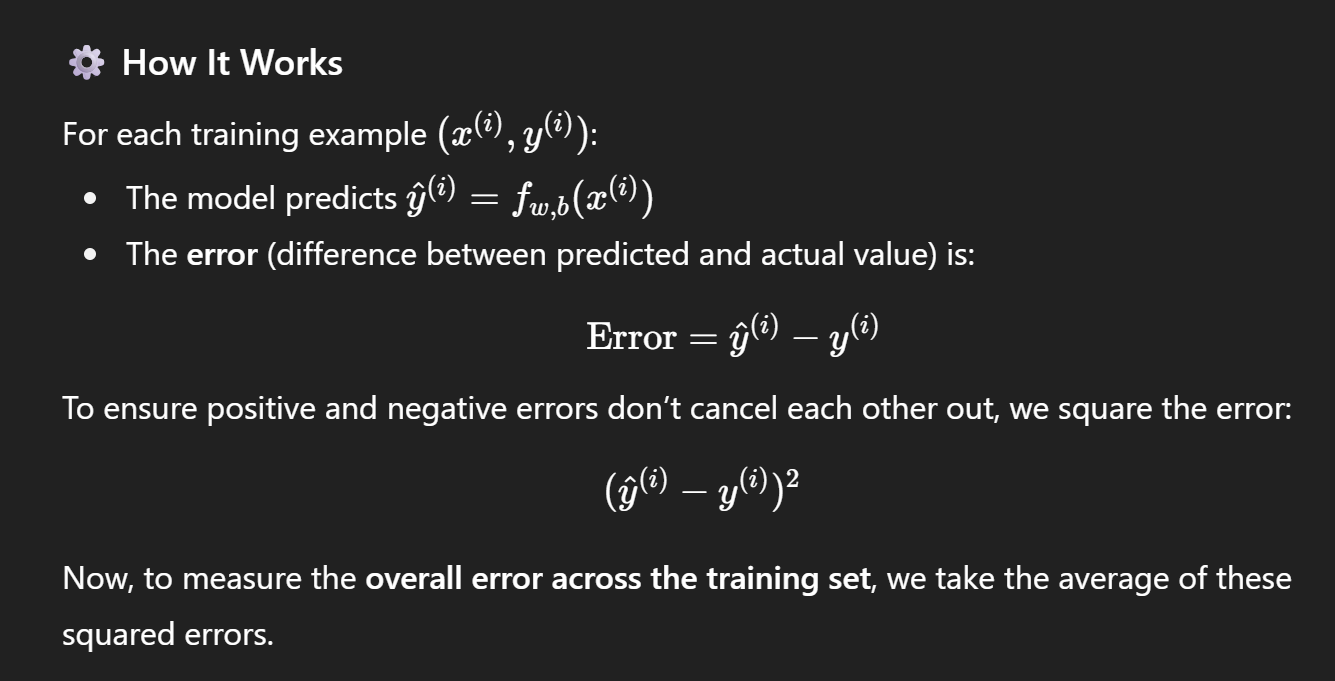
</p>

<p align="left">
  <img src="C:\Users\kushi\OneDrive\Desktop\Pictures\Screenshots 1\Screenshot 2025-10-16 105347.png" width="600"/>
</p>

## Problem Statement

In this lab, you’ll:

Implement and explore the cost function for Linear Regression (one variable).

Dataset:

Size = 1000 sq. ft → Price = $300,000

Size = 2000 sq. ft → Price = $500,000

Objective: Build a model to predict house prices given the house size.

In [34]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

#### 📘 Note:
The file lab_utils_uni.py is a custom helper module, not part of the standard Python library.
It contains visualization functions used throughout this notebook to help understand concepts like cost function and gradient descent.

If you’d like to use it, you can download it from this GitHub repository — it’s available inside the
basic projects/downloads/ folder.

Download these three files and place them in the same directory as your Jupyter Notebook:

1. **lab_utils_uni.py**
2. **lab_utils_common.py**
3. **deeplearning.mplstyle**

Make sure the file is placed in the same directory as this notebook before running the above code.

In [35]:
x_train = np.array([1.0, 2.0]) #size in 1000 sq feet
y_train = np.array([300.0, 500.0]) #price in 1000s of dollars
print(x_train)
print(y_train)

[1. 2.]
[300. 500.]


## Computing the Cost Function
The cost function measures how well our model is predicting the target price.
In other words, the cost function evaluates how close our predictions are to the actual values.

🔍 Recap

The cost function helps us quantify how accurate our model’s predictions are.
As mentioned earlier, it is defined as:

<p align="left">
  <img src="C:\Users\kushi\OneDrive\Desktop\Pictures\Screenshots 1\Screenshot 2025-10-16 112602.png" width="600"/>
</p>

<p align="left">
  <img src="C:\Users\kushi\OneDrive\Desktop\Pictures\Screenshots 1\Screenshot 2025-10-16 112800.png" width="600"/>
</p>

💡 Implementation Detail

In code:

The summation runs from 0 to m−1, while in mathematical notation it’s 1 to m.

You’ll loop through each training example, calculate the prediction, find the squared error, and accumulate it to get the total cost.

##### Inputs:

x: array of input features (e.g., house sizes)

y: array of target values (e.g., actual house prices)

w: weight (slope of the line)

b: bias (intercept of the line)

##### Output:

Returns the cost J(w,b), a measure of how far the predictions are from the actual targets.

In [36]:
def compute_cost(x, y, w, b):
    m = x_train.shape[0] #gives the number of rows in x_train
    cost_sum = 0 #to accumulate the squared errors across all training examples.
    for i in range(m): #Loops over each training example (i from 0 to m−1).For each example, we calculate the prediction and the squared error.
        f_wb = w * x[i] + b #Computes the prediction for the i-th example using the linear regression equation
        cost = (f_wb - y[i]) ** 2 #This is the difference between the prediction and actual target, squared.
        cost_sum = cost_sum + cost #Adds the squared error to cost_sum.After the loop finishes, cost_sum contains the total squared error across all training examples.
    total_cost = (1/(2 * m)) * cost_sum #Computes the average cost by dividing the total squared error by 2m
    return total_cost

## 🧠 Cost Function Intuition

Now that we have implemented the cost function, let’s visualize how it behaves with different values of the model parameters.

🔹 Focusing on w

In the previous Linear Regression with One Variable project, we found that an optimal value for b (bias) is 100.

For intuition, we fix b=100 and vary w to see its effect on the cost.

🔹 Interactive Visualization

We use a slider control to select different values of w.

The plot updates dynamically (may take a few seconds to refresh).

🔹 Observations

##### Cost Minimization:

The cost is minimized at w=200, which matches the result from the previous lab.

This means the model predicts the target values most accurately when w=200 and b=100.

##### Behavior of Cost Function:

The cost increases rapidly when w is either too large or too small.

Squaring the difference between prediction and target in the cost function amplifies these errors.

##### Optimal Fit:

Using the values of w and b obtained by minimizing the cost produces a line that perfectly fits the data points.

Visualizing the cost function helps us understand how model parameters affect the error.
By adjusting w (and b), we can find the combination that minimizes the cost, giving the best possible line for our data.


In [37]:
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

🌐 Cost Function Visualization with Counterplot

Now that we have some intuition for the cost function with respect to a single parameter w, let’s explore how the cost varies with both parameters w and b using a counterplot.

🔹 Setup

We use a larger dataset with more training points.

Some data points do not lie on a straight line, so the cost cannot reach zero.

The counterplot allows us to interactively explore the cost surface by clicking and dragging points corresponding to parameter values.

🔹 How to Interpret the Plots

##### Left Plot:

Shows the difference between predicted values and target values for each training example.

Dashed lines represent the contribution of each example to the overall cost.

Moving the selected point towards the inner oval circle minimizes the cost, producing a line that almost perfectly fits the data points.

##### Right Plot (Contour Plot):

Displays oval-shaped contours representing levels of cost.

The inner contours correspond to lower cost values (better fits).

Dragging the point across these contours helps visualize the optimization path toward the minimum cost.

🔹 Key Observations

Convex Cost Surface:

Because the cost function squares the errors, the surface is convex (like a soup bowl).

There is always a global minimum that can be reached by following the gradient.

Effect of W and B Scaling:

In previous lecture plots, asymmetric scaling of w and b made the convexity less obvious.

In this visualization, we can clearly see that moving toward the inner oval reduces the cost effectively.

##### Comparison Between Points:

Points near the inner oval circle produce a line that fits the data almost perfectly.

Points farther from the inner oval result in larger differences between predicted and target values.

Image 1
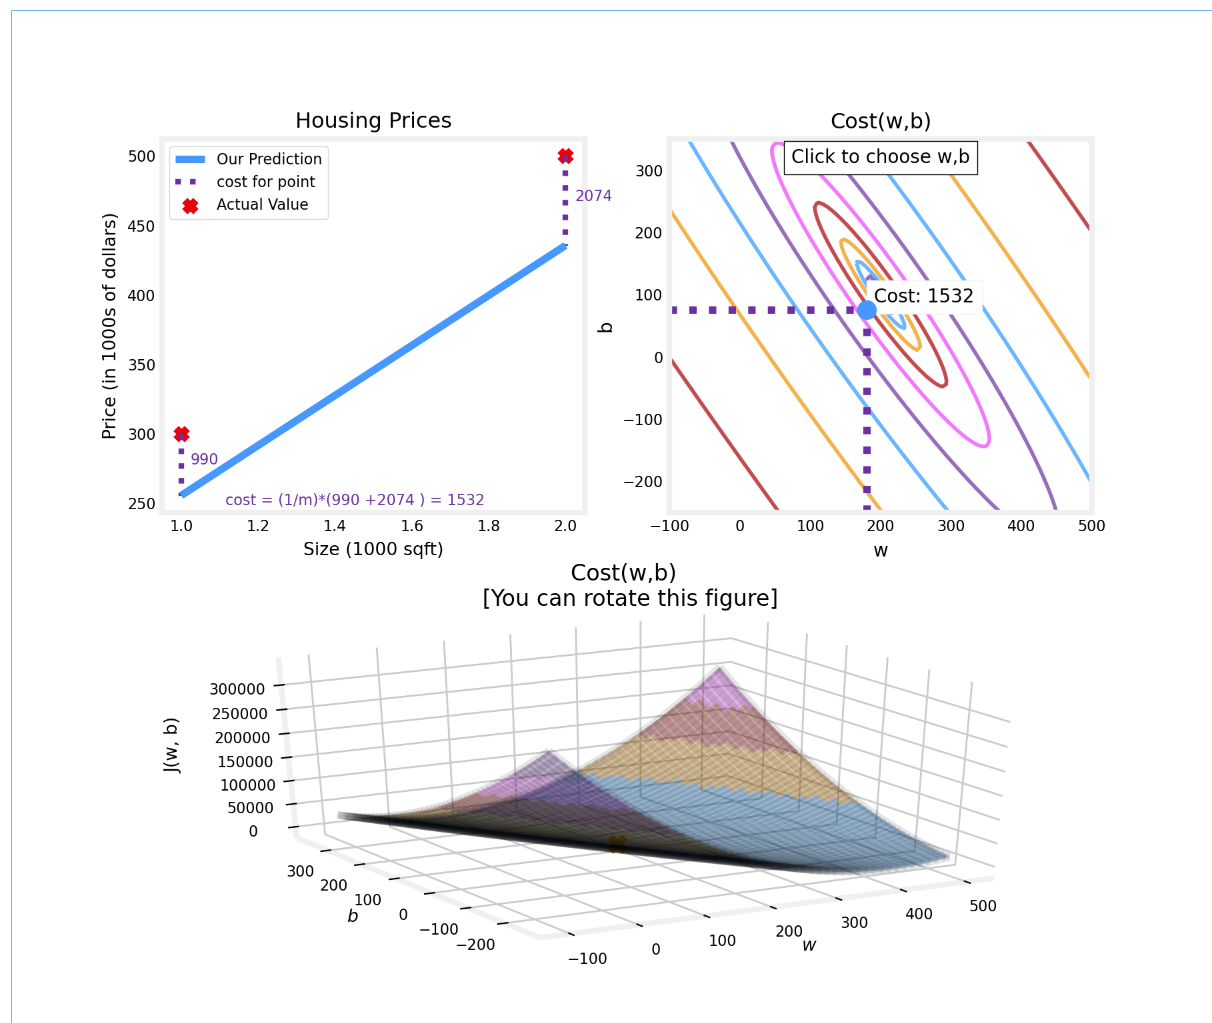

Image 2 
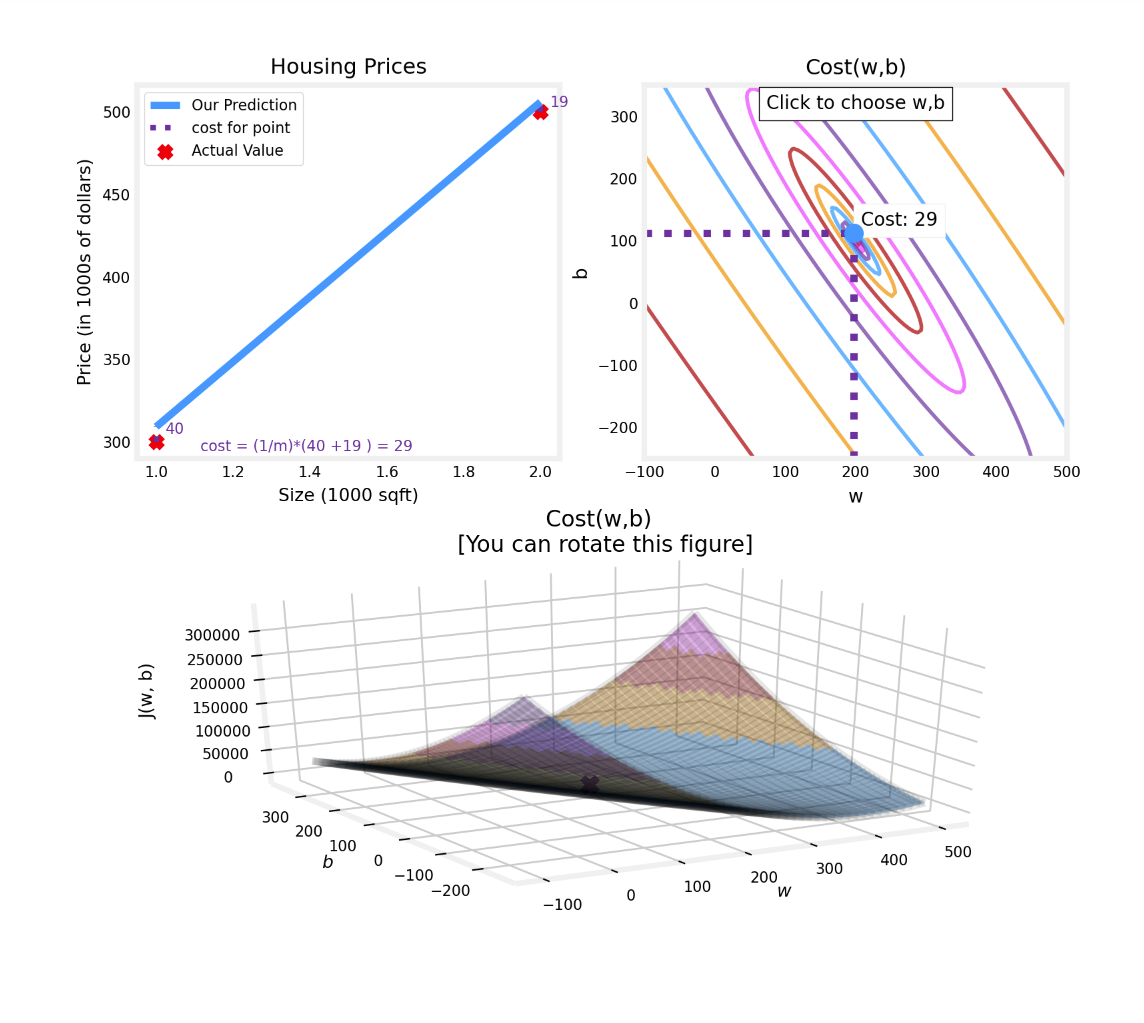

## Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the  𝑤 and  𝑏
  dimensions scale differently, this is not easy to recognize. The following plot, where  𝑤
  and  𝑏
  are symmetric, was shown in lecture:

Image 3 - Note : You cannot rotate the figure its an image

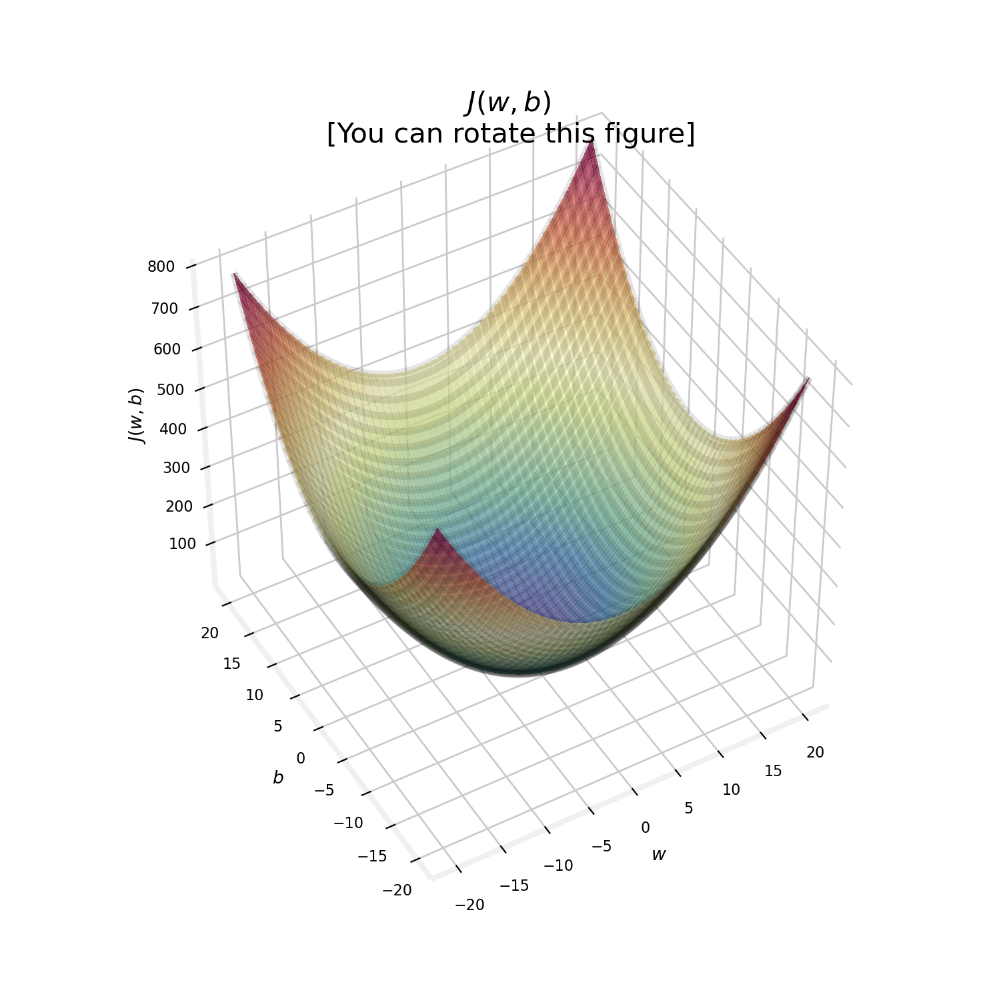